# Model Research Notebook

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [836]:
import networkx as nx
import random
from scipy import stats

## Model Research

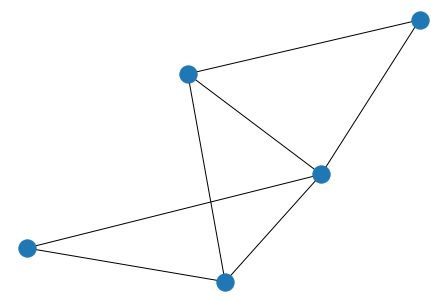

In [1146]:
first = nx.erdos_renyi_graph(5, 0.5)

nx.draw_kamada_kawai(first)

In [870]:
katz = nx.katz_centrality(first)
alpha = min(katz, key=katz.get)

katz

{0: 0.19571958454631053,
 1: 0.2030706390485362,
 2: 0.2559175480380512,
 3: 0.22866472571286572,
 4: 0.18440593730375593,
 5: 0.14353860234821753,
 6: 0.24874759987806627,
 7: 0.1947288412739363,
 8: 0.17745610554630953,
 9: 0.22724410441859164,
 10: 0.16582870816167622,
 11: 0.15872561666519358,
 12: 0.13005597388405887,
 13: 0.2273383995623475,
 14: 0.2866965504964231,
 15: 0.20571420893656375,
 16: 0.2384413896638218,
 17: 0.1761783705251894,
 18: 0.15313932118470336,
 19: 0.12369787600202946,
 20: 0.19820648643370659,
 21: 0.2029604101840931,
 22: 0.15365236754623743,
 23: 0.23368986379100512,
 24: 0.18437050340048977}

In [1148]:
for l in range(10):
    katz = nx.katz_centrality(first)
    alpha = min(katz, key=katz.get)

    new_node = len(first.nodes())
    new_edges = [(new_node, alpha)]
    p_nl = 0.75

    for k in list(first.neighbors(alpha)):
        to_add = (new_node, k)
        C = random.uniform(0, 1)
        if C <= p_nl:
            new_edges.append(to_add)

    first.add_node(new_node)
    first.add_edges_from(new_edges)

In [45]:
list(first.neighbors(alpha))

[4, 8, 10]

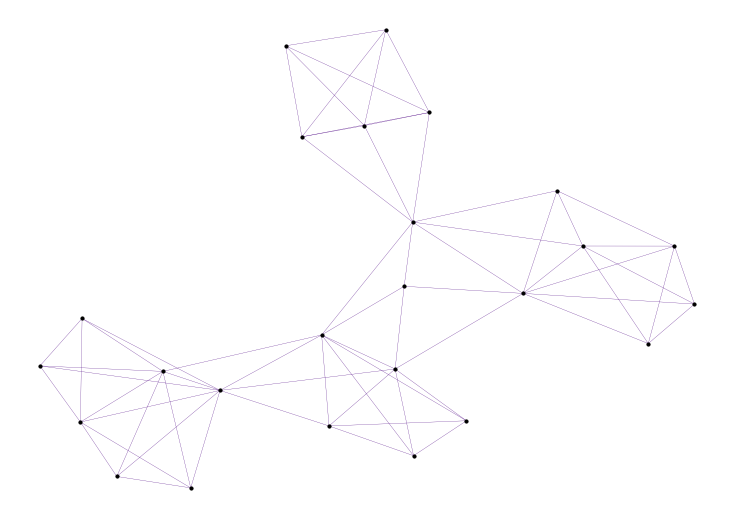

In [1149]:
g_networkDrawingParameters = {
    "node_color": "black",
    "node_size": 10,
    "edge_color": "indigo",
    "width": 0.25
}

nemo = plt.figure(figsize=(10, 7))
nx.draw_kamada_kawai(first, **g_networkDrawingParameters)

In [873]:
def g_process_degreeSequencePDF(degreeSequence):
    max_degree = max(degreeSequence)
    retx, rety = [], []
    normalization_condition = len(degreeSequence)
    for k in range(max_degree + 1):
        count = 0
        for l in degreeSequence:
            if l == k:
                count += 1
        retx.append(k)
        rety.append(count / normalization_condition)
    return retx, rety

def g_compute_standardNormal(x):
    return np.exp(-1 * x*x / 2) / np.sqrt(2 * np.pi)

def g_compute_flDistribution(x, gamma, beta, mu):
    return (
        (np.sqrt(
            (x - mu) / beta
        ) + np.sqrt(
            beta / (x - mu)
        )) / (2 * gamma * (x - mu))
    ) * g_compute_standardNormal(
        (np.sqrt(
            (x - mu) / beta
        ) - np.sqrt(
            beta / (x - mu)
        )) / gamma
    )

0.00448259571524904
25


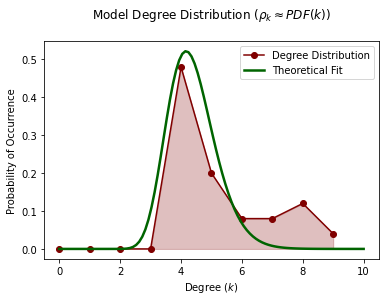

In [1150]:
ds = [d for n, d in first.degree()]
x, y = g_process_degreeSequencePDF(ds)

params, covar = scipy.optimize.curve_fit(g_compute_flDistribution, x, y, bounds=([0.001, 0.001, -10.], [10., 20., -0.001]))

hoox = np.linspace(0, len(x), 100)
hooy = [g_compute_flDistribution(k, *params) for k in hoox]

plt.fill_between(x, 0, y, color="maroon", alpha=0.25)
plt.plot(x, y, "o-", color="maroon",label="Degree Distribution")
plt.plot(hoox, hooy, color="darkgreen", linewidth=2.5, label="Theoretical Fit")
plt.xlabel("Degree ($k$)")
plt.ylabel("Probability of Occurrence")
plt.title(r"Model Degree Distribution ($\rho_k \approx PDF(k)$)" + "\n")
plt.legend()

loss = 0
for k in range(len(x)):
    L = (g_compute_flDistribution(x[k], *params) - y[k]) ** 2
    loss += L
loss /= len(x)
print(loss)
print(first.number_of_nodes())

Text(0.5, 1.0, '$N = 95, p = 0.75$\n')

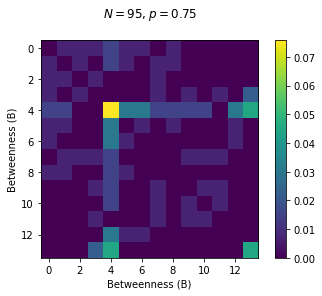

In [1151]:
B = nx.betweenness_centrality(first)
B_list = list(B.values())

nx.set_node_attributes(first, nx.betweenness_centrality(first), "betweenness")

A = nx.attribute_mixing_matrix(first, "betweenness")

# hoohaa = plt.figure(figsize=(10, 10))
# ax1 = hoohaa.subplots(1, 1)
# ax1.hist(x_hoohaa, y_hoohaa)

plt.imshow(A)
plt.colorbar()
plt.xlabel("Betweenness (B)")
plt.ylabel("Betweenness (B)")
plt.title("$N = 95, p = 0.75$\n")

In [946]:
print(nx.diameter(first))
print(first.number_of_nodes())

32
325


0.9588793992048302


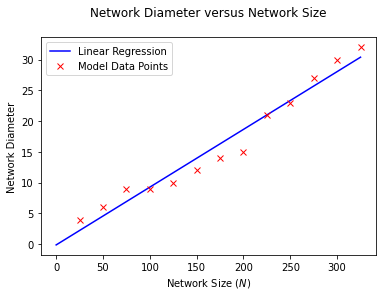

In [1042]:
geex = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325]
geey = [4, 6, 9, 9, 10, 12, 14, 15, 21, 23, 27, 30, 32]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(geex, geey)

toox = np.linspace(0, 325, 325)
tooy = [intercept + (slope * k) for k in toox]

plt.plot(toox, tooy, "b-", label="Linear Regression")

plt.plot(geex, geey, "rx", label="Model Data Points")
plt.xlabel("Network Size ($N$)")
plt.ylabel("Network Diameter")
plt.title("Network Diameter versus Network Size\n")
plt.legend()

print(r_value**2)

0.8951354255154413


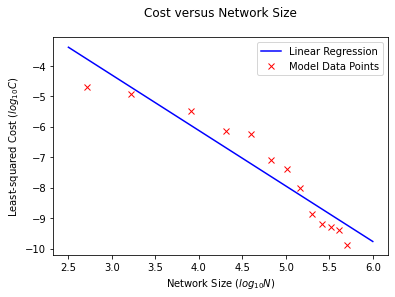

In [1112]:
neex = [15, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300]
neey = [0.009103, 0.00731, 0.004105, 0.002153, 0.00194, 0.0008346,
       0.0006139, 0.00032942, 0.00013952, 0.00010319, 0.0000921031, 0.0000839103, 0.00005109391]

neex = [np.log(k) for k in neex]
neey = [np.log(k) for k in neey]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(neex, neey)

goox = np.linspace(2.5, 6, 100)
gooy = [intercept + (slope * k) for k in goox]

plt.plot(goox, gooy, "b-", label="Linear Regression")

plt.plot(neex, neey, "rx", label="Model Data Points")
plt.xlabel("Network Size ($log_{10} N$)")
plt.ylabel("Least-squared Cost ($log_{10} C$)")
plt.title("Cost versus Network Size\n")
plt.legend()

print(r_value**2)